In [23]:
import pandas as pd 
import numpy as np

#데이터 불러오기

df16 = pd.read_sas('dataset/hn16_all.sas7bdat')
df17 = pd.read_sas('dataset/hn17_all.sas7bdat')
df18 = pd.read_sas('dataset/hn18_all.sas7bdat')

In [142]:
df_all = pd.concat([df16,df17,df18])
df_att = df_all[["sex","age","D_1_1","Total_slp_wd","BP1","BO1","BE5_1","BE8_1","BE8_2","BP5","HE_ht","HE_wt"]]

## 히스토그램 추출

In [143]:
df_att.columns

Index(['sex', 'age', 'D_1_1', 'Total_slp_wd', 'BP1', 'BO1', 'BE5_1', 'BE8_1',
       'BE8_2', 'BP5', 'HE_ht', 'HE_wt'],
      dtype='object')

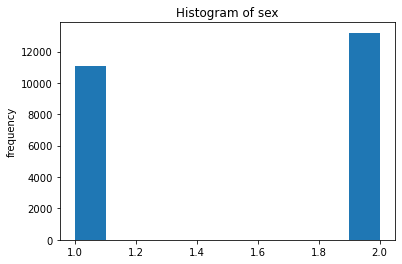

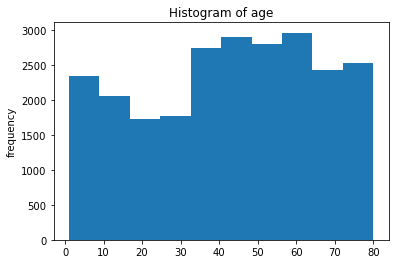

C:\Users\rlagy\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\rlagy\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


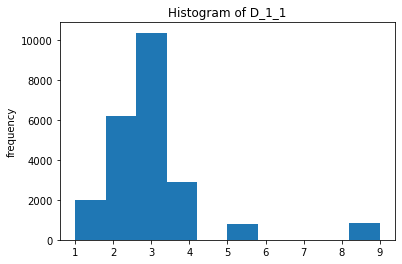

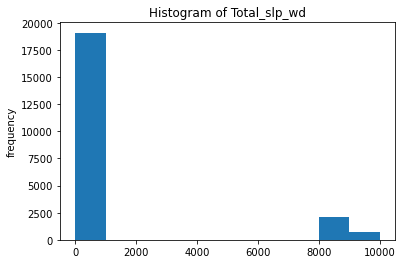

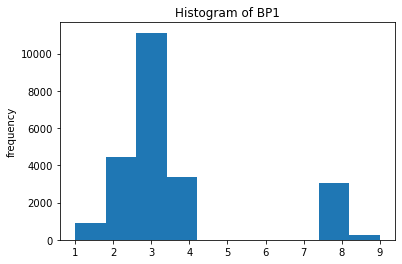

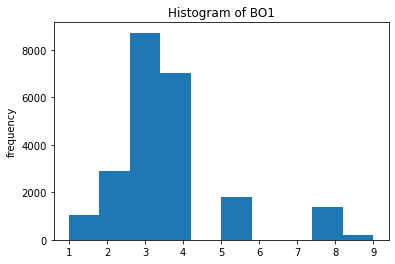

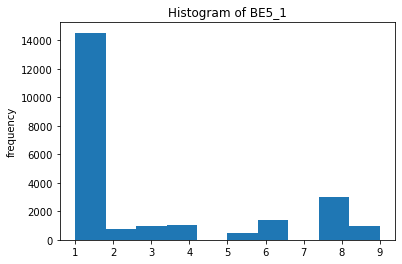

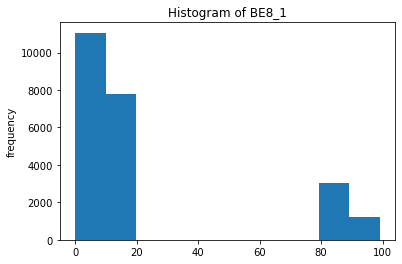

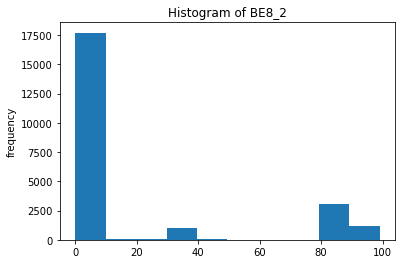

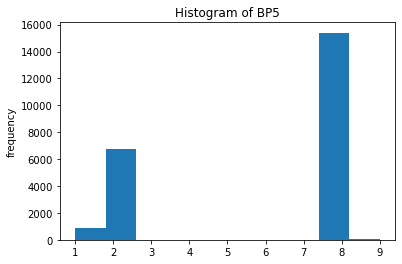

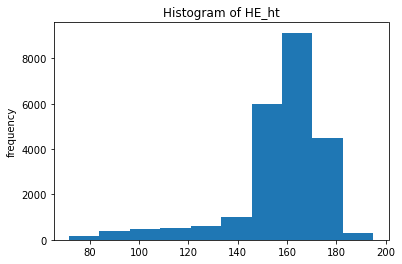

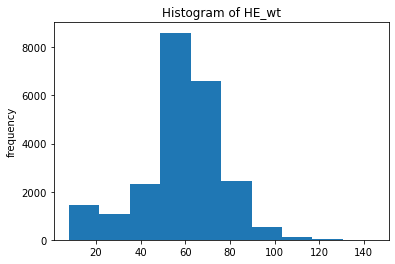

In [144]:
#히스토그램
import matplotlib.pyplot as plt
import seaborn as sns

for df in df_att.columns:
    plt.hist(df_att[df])
    plt.ylabel('frequency')
    plt.title('Histogram of {}'.format(df))
    plt.show()


# Boxplot - 연속형 변수

### 이상치 제거 후, boxplot 확인

In [145]:
df_att = df_att.dropna()

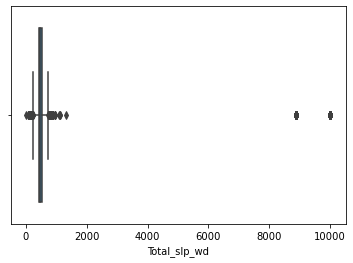

In [146]:
sns.boxplot(df_att.Total_slp_wd)

In [147]:
def remove_outlier(d_cp, column):
    
    fraud_column_data = d_cp[column]
    quan_25 = np.percentile(fraud_column_data, 25)
    quan_75 = np.percentile(fraud_column_data, 75)
    
    iqr = quan_75 - quan_25
    iqr = iqr * 1.5
    lowest = quan_25 - iqr
    highest = quan_75 + iqr
    outlier_index = fraud_column_data[(fraud_column_data<lowest) | (fraud_column_data > highest)].index
    d_cp.drop(outlier_index, axis=0, inplace=True)
    
    return d_cp

In [148]:
df_remove = remove_outlier(df_att, "Total_slp_wd")
df_remove

,sex,age,D_1_1,Total_slp_wd,BP1,BO1,BE5_1,BE8_1,BE8_2,BP5,HE_ht,HE_wt
0,1.0,61.0,3.0,480.0,4.0,4.0,2.0,6.0,0.0,8.0,167.2,68.7
1,2.0,57.0,3.0,540.0,3.0,3.0,1.0,14.0,0.0,8.0,156.6,52.0
2,2.0,41.0,3.0,420.0,3.0,4.0,1.0,11.0,0.0,8.0,157.8,58.8
3,1.0,39.0,4.0,420.0,2.0,5.0,1.0,4.0,0.0,8.0,176.7,93.4
7,2.0,44.0,2.0,480.0,4.0,3.0,1.0,7.0,0.0,8.0,156.4,52.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7975,1.0,50.0,3.0,660.0,4.0,4.0,1.0,10.0,0.0,8.0,179.2,86.6
7978,1.0,42.0,3.0,510.0,3.0,3.0,1.0,5.0,0.0,8.0,175.5,78.1
7981,1.0,41.0,2.0,570.0,2.0,4.0,1.0,14.0,0.0,8.0,178.7,91.0
7982,2.0,35.0,2.0,510.0,4.0,3.0,1.0,4.0,0.0,8.0,159.8,55.6


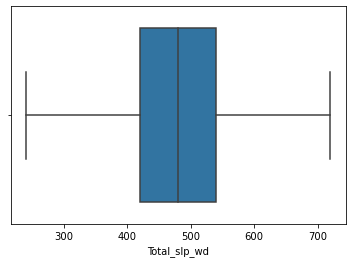

In [149]:
sns.boxplot(df_remove.Total_slp_wd)